## Sarcasm_Headlines

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\denni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\denni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df['headline'][9]
#df.head()

'lots of parents know this scenario'

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.drop_duplicates(inplace=True)
df.isna().any()

is_sarcastic    False
headline        False
article_link    False
dtype: bool

In [5]:
#check if dataset is balanced
df["is_sarcastic"].value_counts()

0    14984
1    13633
Name: is_sarcastic, dtype: int64

# Remove Stopwords

In [6]:
stop = stopwords.words('english')
df['headline'] = df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #CHTGPT

In [7]:
df['headline'][9]

'lots parents know scenario'

# Stemming

In [8]:
ps = PorterStemmer()
df['headline'] = df['headline'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

# Lemmatization

In [9]:
lemmatizer = WordNetLemmatizer()

df['headline'] = df['headline'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [10]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock h...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. total nail congress fall short gender...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggies: 9 delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar get work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close use word 'streaming' ...,https://www.theonion.com/mother-comes-pretty-c...


# Data Exploration

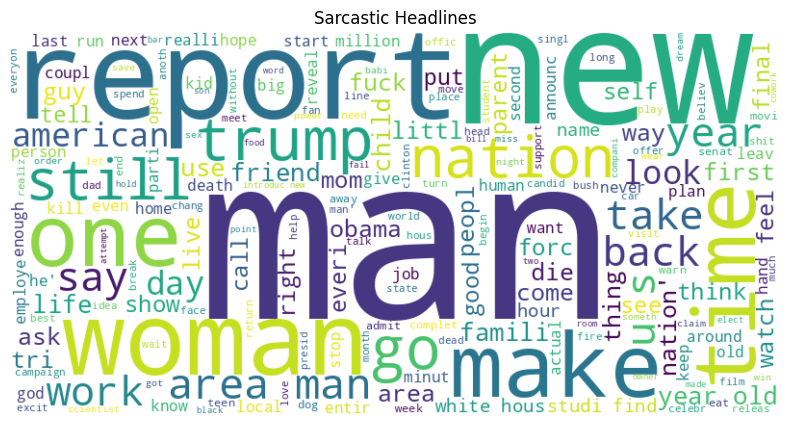

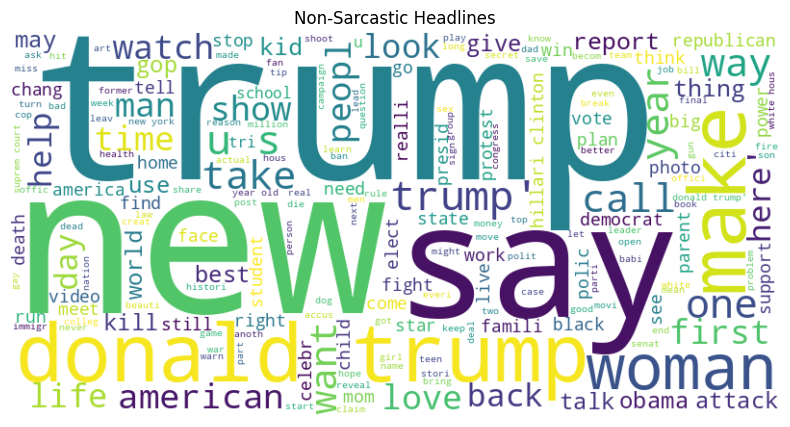

In [14]:
#CHTGPT
df_sarcastic = df[df['is_sarcastic'] == 1]
df_not_sarcastic = df[df['is_sarcastic'] == 0]

# Create a function to generate a word cloud plot
def plot_wordcloud(df_subset, title):
    # Concatenate all the headlines into a single string
    text = " ".join(headline for headline in df_subset['headline'])

    # Generate a word cloud object
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.savefig('plots/'+ title + '.png')
    plt.show()

# Generate the word cloud plot for sarcastic headlines
plot_wordcloud(df_sarcastic, "Sarcastic Headlines")

# Generate the word cloud plot for non-sarcastic headlines
plot_wordcloud(df_not_sarcastic, "Non-Sarcastic Headlines")


C:\Users\denni\AppData\Local\Temp\ipykernel_19960\74191055.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')


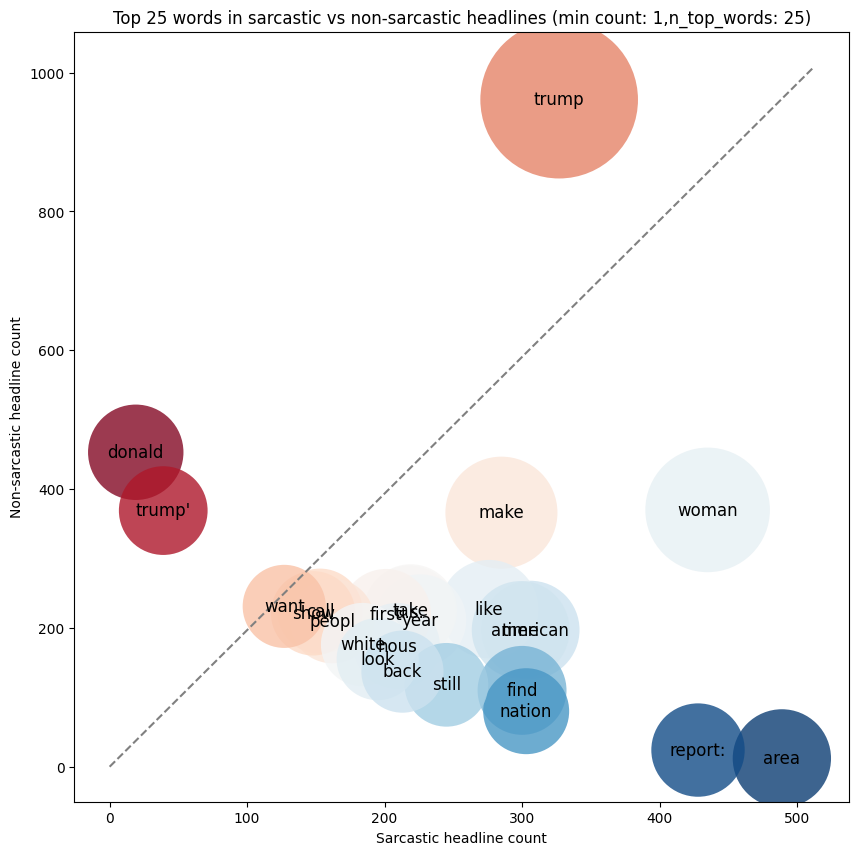

In [41]:
#CHGTPT
min_count = 1
n_top_words = 25

# Count the frequency of each word in sarcastic and non-sarcastic headlines
word_counts = {}
for index, row in df.iterrows():
    for word in row['headline'].split():
        if len(word) > 3:
            if word not in word_counts:
                word_counts[word] = {
                    'count_sarcastic': 0,
                    'count_non_sarcastic': 0,
                    'count_total': 0
                }
            word_counts[word]['count_total'] += 1
            if row['is_sarcastic'] == 1:
                word_counts[word]['count_sarcastic'] += 1
            else:
                word_counts[word]['count_non_sarcastic'] += 1

# Convert the word counts to a DataFrame
df_words = pd.DataFrame.from_dict(word_counts, orient='index')
df_words = df_words[df_words['count_total'] >= min_count]

# Sort the DataFrame by total count
df_words = df_words.sort_values('count_total', ascending=False)

# Select the top n words

df_words = df_words.nlargest(n_top_words, 'count_total')

# Compute the proportion of sarcastic headlines for each word
df_words['prop_sarcastic'] = df_words['count_sarcastic'] / df_words['count_total']

# Define the color map
cmap = cm.get_cmap('RdBu')
colors = cmap(df_words['prop_sarcastic'])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(
    x=df_words['count_sarcastic'], 
    y=df_words['count_non_sarcastic'], 
    s=df_words['count_total']*10,
    alpha=0.8,
    edgecolors='none',
    c=colors
)

# Add a 45-degree line starting from (0,0)
ax.plot([0, ax.get_xlim()[1]], [0, ax.get_ylim()[1]], ls='--', color='gray')

for index, row in df_words.iterrows():
    ax.annotate(row.name, 
                (row['count_sarcastic'], row['count_non_sarcastic']), 
                fontsize=12, 
                ha='center', 
                va='center')

ax.set_xlabel('Sarcastic headline count')
ax.set_ylabel('Non-sarcastic headline count')

ax.set_title(f'Top {n_top_words} words in sarcastic vs non-sarcastic headlines (min count: {min_count},n_top_words: {n_top_words})')

plt.savefig('plots/word_bubbles.png', dpi=300)
plt.show()



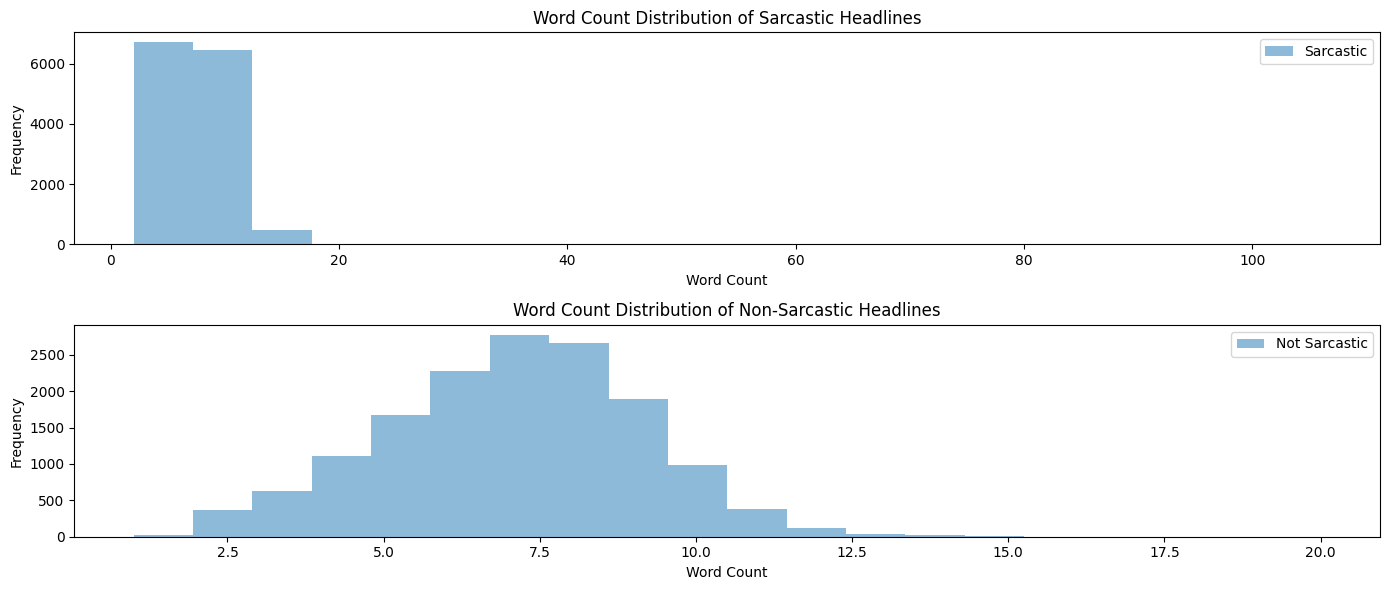

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))
ax[0].hist(df[df['is_sarcastic']==1]['headline'].apply(lambda x: len(x.split())), bins=20, alpha=0.5, label='Sarcastic')
ax[1].hist(df[df['is_sarcastic']==0]['headline'].apply(lambda x: len(x.split())), bins=20, alpha=0.5, label='Not Sarcastic')
ax[0].set_title('Word Count Distribution of Sarcastic Headlines')
ax[1].set_title('Word Count Distribution of Non-Sarcastic Headlines')
ax[0].set_xlabel('Word Count')
ax[1].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('plots/word_count_hist_1.png', dpi=300)
plt.show()

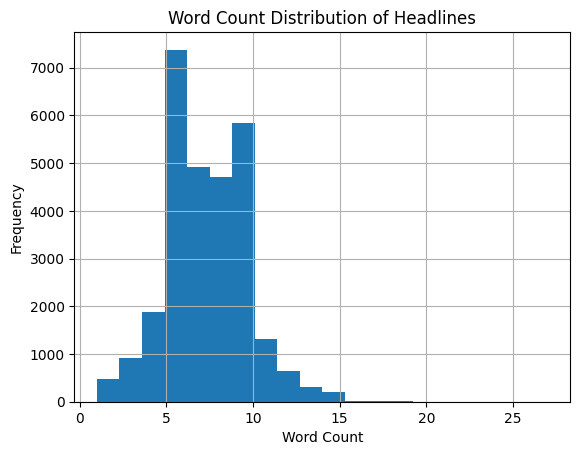

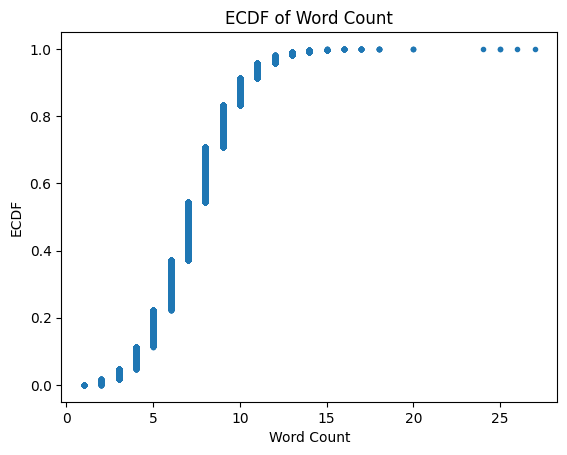

In [43]:
# Give column with max len
df['headline'].apply(lambda x: len(x.split())).idxmax()

# print the max len headline
df['headline'][df['headline'].apply(lambda x: len(x.split())).idxmax()]

# remove the max len headline column
df.drop(df['headline'].apply(lambda x: len(x.split())).idxmax(), inplace=True)

# histogram of len of headlines
df['headline'].apply(lambda x: len(x.split())).hist(bins=20)
plt.title('Word Count Distribution of Headlines')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('plots/word_count_hist_2.png', dpi=300)
plt.show()


# ecdf diagram of length of headlines
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDF for word count
x, y = ecdf(df['headline'].apply(lambda x: len(x.split())))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Word Count')
plt.ylabel('ECDF')
plt.title('ECDF of Word Count')
plt.savefig('plots/word_count_ecdf.png', dpi=300)
plt.show()

